In [1]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.fftpack as fft
import matplotlib.colors as col
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100

In [3]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

clim=(350,780)
norm = mp.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = col.LinearSegmentedColormap.from_list("spectrum", colorlist)

In [6]:
dat = np.genfromtxt("frequency.csv", delimiter=",")
dat = np.delete(dat, 2, axis=1)
time, volt = dat.T
time += abs(min(time))
rate = len(time)//max(time)

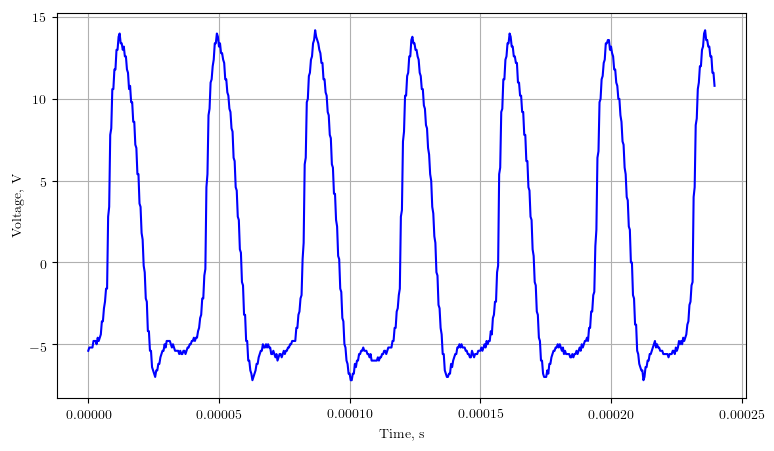

In [7]:
mp.plot(time, volt, "b-")
mp.xlabel("Time, s")
mp.ylabel("Voltage, V")
mp.grid(True)
mp.show()

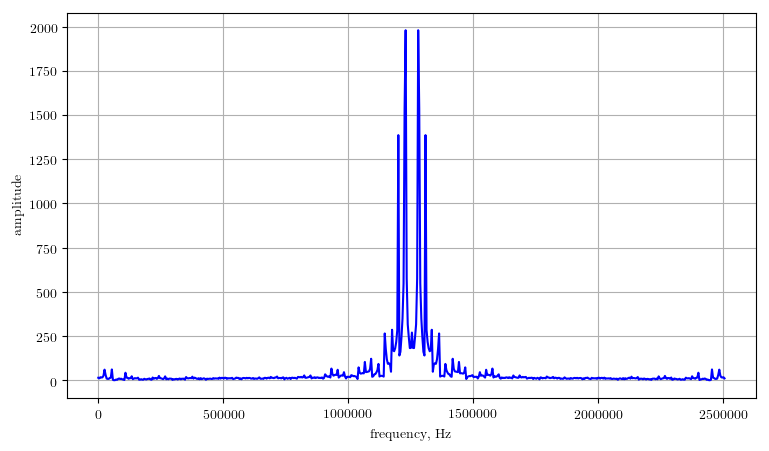

In [8]:
c = fft.fft(volt)
f = np.linspace(0, rate, len(time))

mp.plot(f, fft.fftshift(abs(c)), "b-")
mp.xlabel("frequency, Hz")
mp.ylabel("amplitude")
mp.grid()
mp.show()

In [9]:
np.argmax(abs(c))*rate/len(time)

25041.73

In [29]:
wav, rel = np.loadtxt("intensity.txt").T

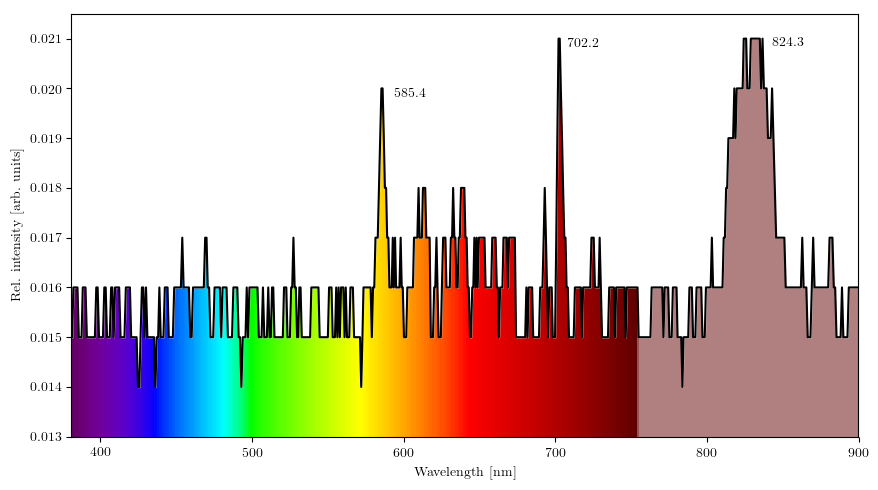

In [98]:
fig, ax = mp.subplots(1,1, tight_layout=True)

mp.plot(wav, rel, color='k')

y = np.linspace(0.013, 0.021, 100)
X,Y = np.meshgrid(wav, y)

extent=(np.min(wav), np.max(wav), np.min(y), np.max(y))

mp.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
mp.xlabel('Wavelength [nm]')
mp.ylabel('Rel. intensity [arb. units]')

ax.text(0.63, 0.92, (wav[np.argmax(rel)]), transform=ax.transAxes)
ax.text(0.89, 0.92, wav[np.argmax(rel[500:])+500], transform=ax.transAxes)
ax.text(0.41, 0.8, wav[np.argmax(rel[:300])], transform=ax.transAxes)

mp.fill_between(wav, rel, 0.0211, color='w')

mp.show()